In [108]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [110]:
df_train = pd.read_csv("./train.tsv",sep="\t")
df_test = pd.read_csv("./test.tsv",sep="\t")
df_sample_submit = pd.read_csv("./sample_submit.csv",header=None)
df_train = df_train.drop("Unnamed: 0",axis=1)
df_test = df_test.drop("Unnamed: 0",axis=1)
df_train["right"] = df_train["right_distance"] * df_train["right_weight"]
df_train["left"] = df_train["left_distance"] * df_train["left_weight"]
df_test["right"] = df_test["right_distance"] * df_test["right_weight"]
df_test["left"] = df_test["left_distance"] * df_test["left_weight"]

display(df_train.head())
display(df_test.head())
display(df_sample_submit.head())

,class,left_weight,left_distance,right_weight,right_distance,right,left
0,2,2,4,4,3,12,8
1,0,2,2,1,3,3,4
2,0,2,4,4,1,4,8
3,2,3,3,3,5,15,9
4,0,3,4,5,2,10,12


,left_weight,left_distance,right_weight,right_distance,right,left
0,4,5,4,3,12,20
1,3,2,1,5,5,6
2,1,4,5,1,5,4
3,5,4,4,4,16,20
4,2,2,4,1,4,4


,0,1
0,0,1
1,1,0
2,3,0
3,4,0
4,5,2


In [112]:
target_col = ["class"]
feature_col=["right","left"]

In [153]:
display(len(df_train))
display(len(df_test))
display(len(df_sample_submit))

312

313

313

<Axes: xlabel='left_weight', ylabel='right_weight'>

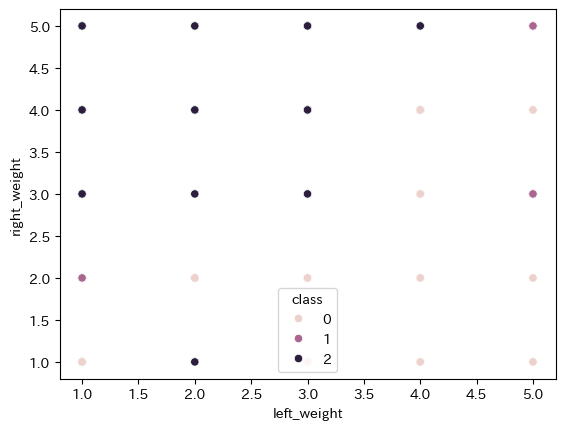

In [116]:
sns.scatterplot(x="left_weight",y="right_weight",hue="class",data=df_train)

In [157]:
y_train = df_train["class"]
y_train.columns = ["class"]
X_train = df_train[feature_col]
X_test = df_test[feature_col]
display(y_train.head())
display(X_train.head())
display(X_test.head())

0    2
1    0
2    0
3    2
4    0
Name: class, dtype: int64

,right,left
0,12,8
1,3,4
2,4,8
3,15,9
4,10,12


,right,left
0,12,20
1,5,6
2,5,4
3,16,20
4,4,4


In [159]:
model = DecisionTreeClassifier(max_depth=3,random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [161]:
y_train_pred = model.predict(X_train)
display(y_train_pred)

array([2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2,

In [163]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8782051282051282

In [165]:
y_train_pred = model.predict(X_test)
display(y_train_pred)

array([0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2,

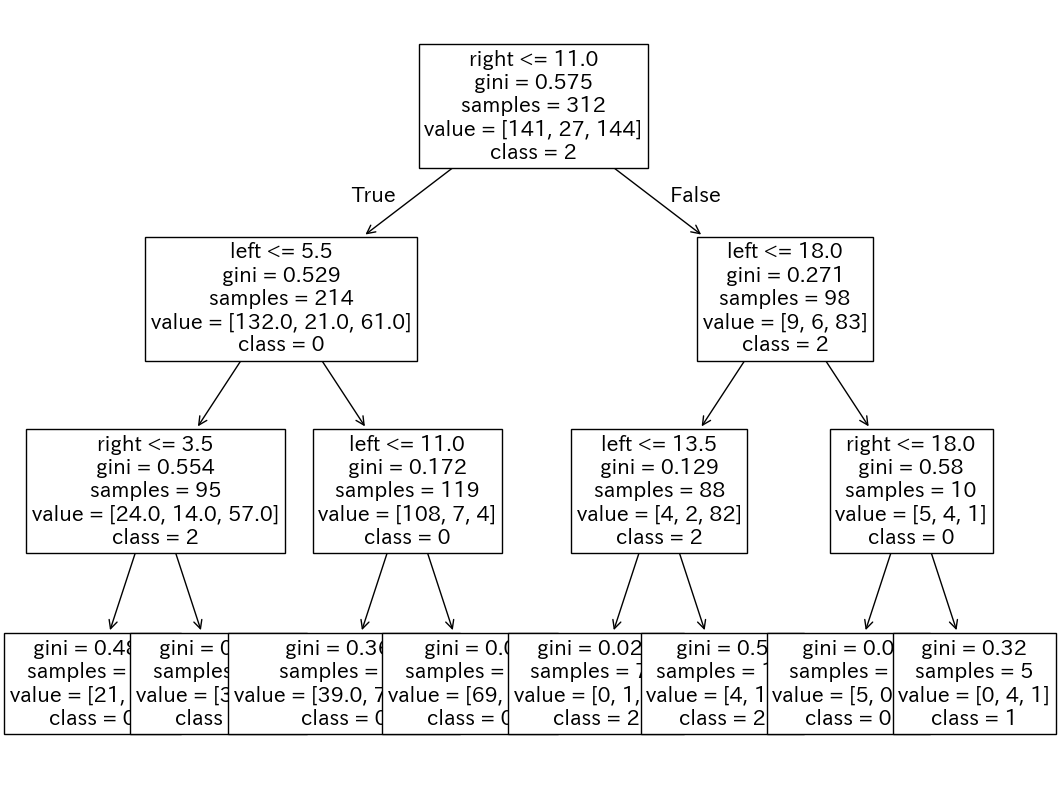

In [167]:
plt.figure(figsize=(13,10))
plot_tree(model,fontsize=15,feature_names=["right","left"],class_names=["0","1","2"])
plt.show()

In [169]:
df_sample_submit[1] = y_train_pred
df_sample_submit.to_csv("./sample_submit.csv",index=False,header=None)